# kMeans

In [10]:
import numpy as np
import random 

class kMeans:
    def __init__(self, n_clusters: int = 8,max_iter: int = 300) -> None:
        self.n_clusters = n_clusters
        self.max_iter = max_iter

    def distance(self, a: np.ndarray, b: np.ndarray) -> float:
        """Вычисляет расстояние между двумя объектами"""
        return np.sqrt(((a - b)**2).sum())

    def random_centroids(self,X: np.ndarray) -> np.ndarray:
        """Генерирует рандомные центроиды из датафрейма"""
        indexes = random.sample(range(0,X.shape[0]),self.n_clusters)
        return X[indexes]
    
    def fit(self, X: np.ndarray):
        self.labels_ = None
        # выбираем рандомные центроиды
        self.cluster_centers_ = self.random_centroids(X)
        for _ in range(self.max_iter):
            # считаем расстояния всех объектов до каждого из центроидов
            distances = np.array(
                [[self.distance(row,centroid) for centroid in self.cluster_centers_] for row in X]
            )
            # разбиваем данные по кластерам
            # т.е определяем индекс минимального элемента в каждой строке
            clusters = np.array(
                [np.where(row == row.min())[0][0] for row in distances]
            )
            # если кластеры у объектов не поменялись, то выходим из цикла
            if np.array_equal(self.labels_,clusters):
                break
            self.labels_ = clusters

            # группируем кластеры по их массивам
            clusters = [np.where(clusters == unique_cluster)[0] for unique_cluster in np.unique(clusters)]
            # находим координаты новых центроидов
            # т.е находим сумму по каждой коорденате и делим на количество строчек в кластере
            self.cluster_centers_ = np.array(
                [X[indexes].sum(axis=0) / indexes.shape[0] for indexes in clusters]
            )
        return self
    
    def predict(self, X: np.ndarray) -> np.ndarray:
        # считаем расстояния всех объектов до каждого из центроидов
        distances = np.array(
            [[self.distance(row,centroid) for centroid in self.cluster_centers_] for row in X]
        )
        # разбиваем данные по кластерам
        # т.е определяем индекс минимального элемента в каждой строке
        clusters = np.array(
            [np.where(row == row.min())[0][0] for row in distances]
        )
        return clusters

In [11]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

x,y = make_blobs(
    n_samples=10000,
    n_features=5,
)

kmeans = kMeans(3).fit(x)
sklearn = KMeans(3,n_init='auto').fit(x)

In [12]:
from sklearn.metrics import silhouette_score

print(silhouette_score(x,kmeans.labels_),silhouette_score(x,sklearn.labels_))

0.6340274910781096 0.6340274910781096


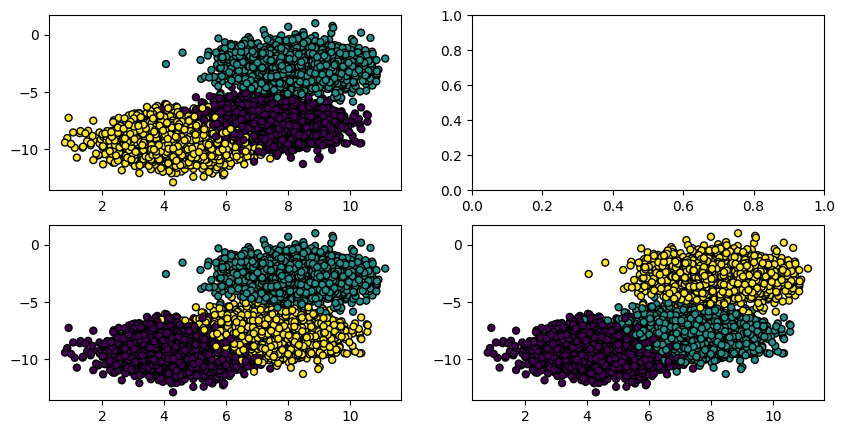

In [13]:
import matplotlib.pyplot as plt

fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,figsize=(10,5))

ax1.scatter(x[:,0], x[:, 1], marker="o", c=y, s=25, edgecolor="k")
ax3.scatter(x[:,0], x[:, 1], marker="o", c=kmeans.labels_, s=25, edgecolor="k")
ax4.scatter(x[:,0], x[:, 1], marker="o", c=sklearn.labels_, s=25, edgecolor="k")

In [18]:
from sklearn.datasets import make_classification

x,y = make_classification(
    n_samples=10000,
    n_classes=2,
    n_features=2,
    n_redundant=0
)

kmeans = kMeans(2).fit(x)
sklearn = KMeans(2).fit(x)

c:\Python\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


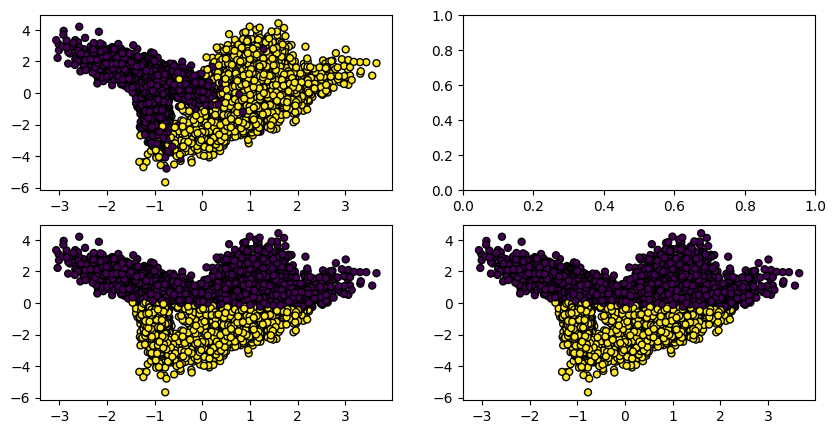

In [19]:
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,figsize=(10,5))

ax1.scatter(x[:,0], x[:, 1], marker="o", c=y, s=25, edgecolor="k")
ax3.scatter(x[:,0], x[:, 1], marker="o", c=kmeans.labels_, s=25, edgecolor="k")
ax4.scatter(x[:,0], x[:, 1], marker="o", c=sklearn.labels_, s=25, edgecolor="k")